In [29]:
import pandas as pd
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [30]:
data = pd.read_csv("data/cancer.csv")

In [31]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [33]:
# Dropping unnecessary columns
data = data.drop(columns=['Unnamed: 32', 'id'])

# Handling missing values (if any)
# Checking for columns with missing values
missing_cols = data.columns[data.isnull().any()]
if len(missing_cols) > 0:
    # Handle missing values using appropriate strategies (e.g., imputation or removal)
    data = data.dropna()

# Encoding the target variable
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Splitting features and target variable
features = data.drop(columns=['diagnosis'])
target = data['diagnosis']

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


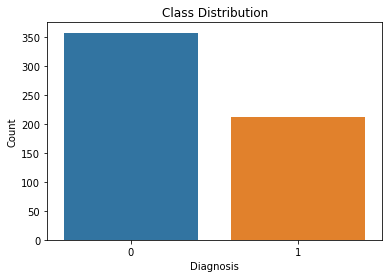

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['diagnosis'])
plt.title('Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [35]:
data.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


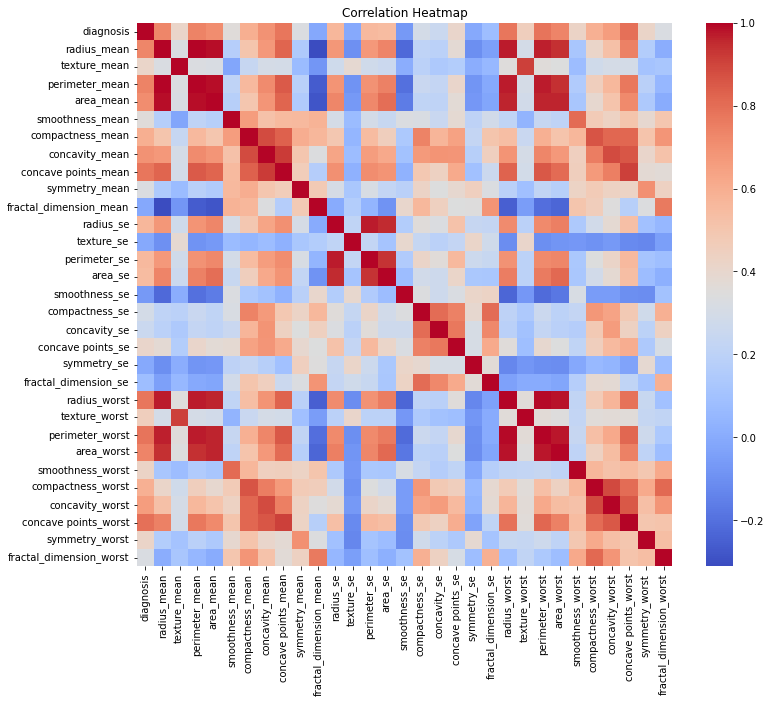

In [36]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



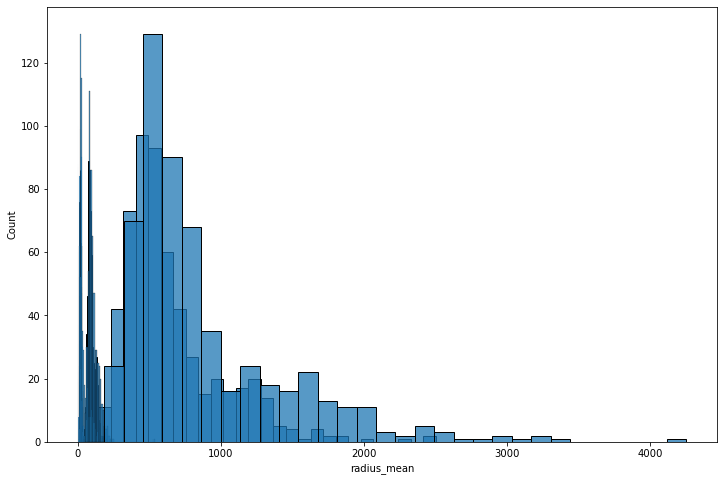

In [37]:
# Histograms
plt.figure(figsize=(12, 8))
for feature in features.columns:
    sns.histplot(data[feature], multiple='stack')
plt.show()



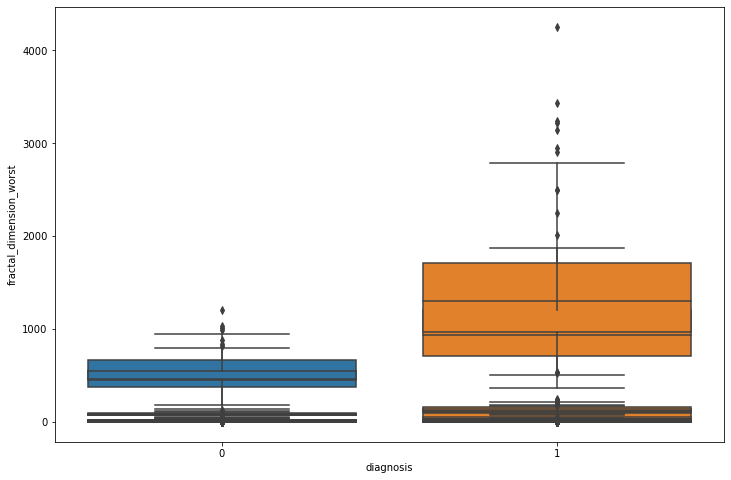

In [38]:
# Box Plots
plt.figure(figsize=(12, 8))
for feature in features.columns:
    sns.boxplot(x='diagnosis', y=feature, data=data)
plt.show()

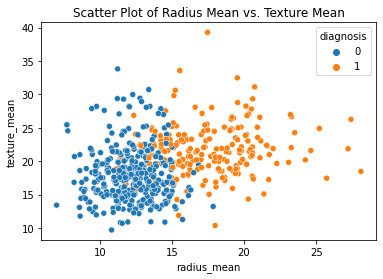

In [39]:
sns.scatterplot(data=data, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.title('Scatter Plot of Radius Mean vs. Texture Mean')
plt.show()

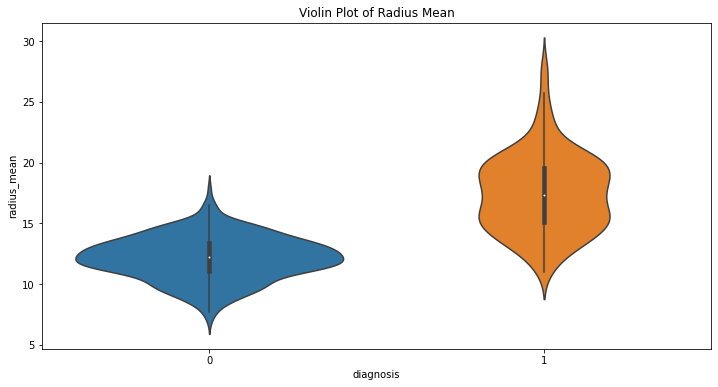

In [40]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='diagnosis', y='radius_mean')
plt.title('Violin Plot of Radius Mean')
plt.show()

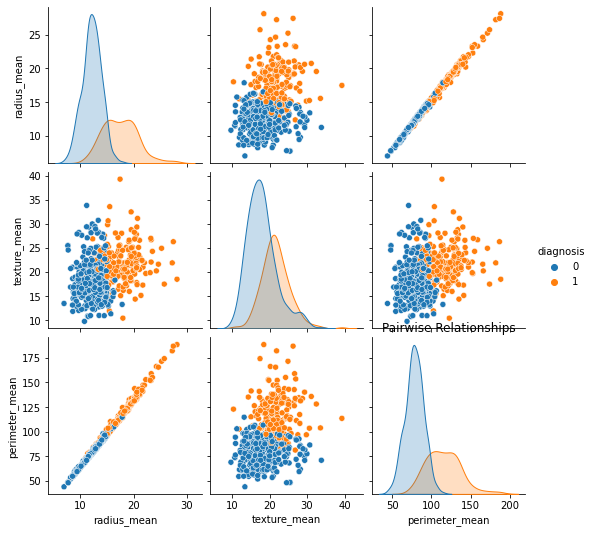

In [41]:
sns.pairplot(data, vars=['radius_mean', 'texture_mean', 'perimeter_mean'], hue='diagnosis')
plt.title('Pairwise Relationships')
plt.show()

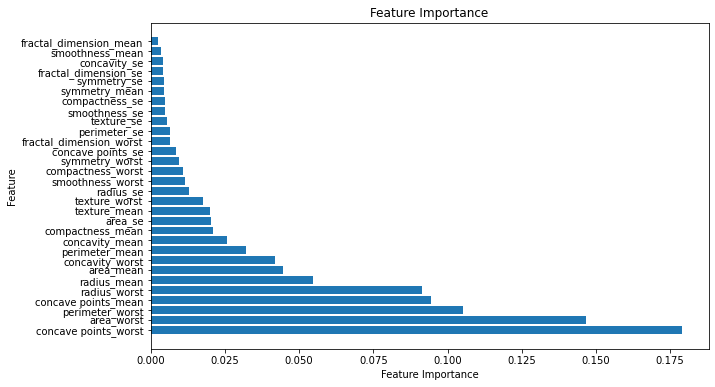

In [42]:
from sklearn.ensemble import RandomForestClassifier


# Initialize the Random Forest classifier
model = RandomForestClassifier()
model.fit(features, target)

# Calculate feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to store feature importance values
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [43]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(features, target)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=features.columns)

# Select top k features
k = 10  # Select top 10 features (you can adjust this as per your requirements)
selected_features = feature_importances.nlargest(k).index

# Subset the features dataframe with selected features
selected_features_df = features[selected_features]

In [44]:
print(selected_features_df)

     radius_worst  concave points_worst  perimeter_worst  area_worst  \
0          25.380                0.2654           184.60      2019.0   
1          24.990                0.1860           158.80      1956.0   
2          23.570                0.2430           152.50      1709.0   
3          14.910                0.2575            98.87       567.7   
4          22.540                0.1625           152.20      1575.0   
..            ...                   ...              ...         ...   
564        25.450                0.2216           166.10      2027.0   
565        23.690                0.1628           155.00      1731.0   
566        18.980                0.1418           126.70      1124.0   
567        25.740                0.2650           184.60      1821.0   
568         9.456                0.0000            59.16       268.6   

     concave points_mean  concavity_mean  concavity_worst  perimeter_mean  \
0                0.14710         0.30010           0.7119 

In [45]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_df, target, test_size=0.2, random_state=42)

In [46]:
X_train.shape, X_test.shape

((455, 10), (114, 10))

## Create an Evaluate Function to give all metrics after model Training

In [47]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [48]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2520
- Mean Absolute Error: 0.1972
- R2 Score: 0.7280
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2510
- Mean Absolute Error: 0.2003
- R2 Score: 0.7318


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.3237
- Mean Absolute Error: 0.2564
- R2 Score: 0.5513
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2975
- Mean Absolute Error: 0.2394
- R2 Score: 0.6233


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2605
- Mean Absolute Error: 0.2071
- R2 Score: 0.7093
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2445
- Mean Absolute Error: 0.1974
- R2 Score: 0.7456


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2080
- Mean Absolute Error: 0.0826
- R2 Score: 0.8147
-----------------------

## results

In [49]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,K-Neighbors Regressor,0.871549
7,CatBoosting Regressor,0.871180
5,Random Forest Regressor,0.862435
8,AdaBoost Regressor,0.811947
6,XGBRegressor,0.794068
2,Ridge,0.745615
4,Decision Tree,0.738618
0,Linear Regression,0.731811
1,Lasso,0.623281


## CatBoosting Regressor

In [50]:
# Create and train the CatBoostRegressor model
cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6)
cat_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = cat_model.predict(X_test)

# Calculate the R-squared score
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

0:	learn: 0.4499286	total: 6.68ms	remaining: 662ms
1:	learn: 0.4161138	total: 12ms	remaining: 587ms
2:	learn: 0.3859907	total: 17.7ms	remaining: 572ms
3:	learn: 0.3599285	total: 23.4ms	remaining: 561ms
4:	learn: 0.3359543	total: 28.7ms	remaining: 546ms
5:	learn: 0.3156980	total: 34.5ms	remaining: 540ms
6:	learn: 0.2979503	total: 40ms	remaining: 531ms
7:	learn: 0.2817322	total: 46.6ms	remaining: 536ms
8:	learn: 0.2672762	total: 52.2ms	remaining: 528ms
9:	learn: 0.2534757	total: 57.8ms	remaining: 520ms
10:	learn: 0.2421341	total: 63.5ms	remaining: 514ms
11:	learn: 0.2321741	total: 70.6ms	remaining: 518ms
12:	learn: 0.2227171	total: 76.9ms	remaining: 515ms
13:	learn: 0.2144815	total: 83ms	remaining: 510ms
14:	learn: 0.2068253	total: 87.7ms	remaining: 497ms
15:	learn: 0.1994594	total: 93.3ms	remaining: 490ms
16:	learn: 0.1943246	total: 99.2ms	remaining: 484ms
17:	learn: 0.1887551	total: 106ms	remaining: 484ms
18:	learn: 0.1837969	total: 112ms	remaining: 478ms
19:	learn: 0.1791632	total: 11

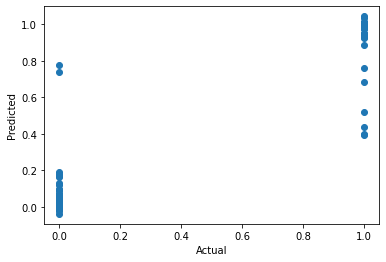

In [51]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

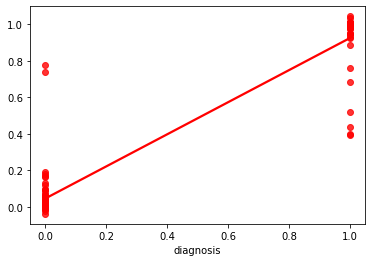

In [52]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## Difference between Actual and Predicted Values

In [53]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
204,0,0.191844,-0.191844
70,1,1.001838,-0.001838
131,1,1.036199,-0.036199
431,0,0.008439,-0.008439
540,0,-0.012301,0.012301
...,...,...,...
486,0,0.122068,-0.122068
75,1,1.009331,-0.009331
249,0,0.013969,-0.013969
238,0,0.129339,-0.129339


# PREDICT RISK

In [56]:
# Create a function to take user inputs and make predictions
def predict_disease_risk(model):
    # Create an empty dictionary to store user inputs
    user_inputs = {}

    # Iterate through each feature column and get user inputs
    for feature in X_test.columns:
        user_input = input(f"Enter the value for {feature}: ")
        # Convert the user input to the appropriate data type
        user_inputs[feature] = float(user_input)

    # Create a DataFrame from the user inputs
    user_data = pd.DataFrame([user_inputs])

    # Make predictions on the user data using the trained model
    risk_prediction = model.predict(user_data)

    # Display the predicted disease risk
    print("Predicted Disease Risk: ", risk_prediction)

# Call the function to make predictions with user inputs
predict_disease_risk(cat_model)

Enter the value for radius_worst: 12
Enter the value for concave points_worst: 21
Enter the value for perimeter_worst: 23
Enter the value for area_worst: 123
Enter the value for concave points_mean: 21
Enter the value for concavity_mean: 12
Enter the value for concavity_worst: 21
Enter the value for perimeter_mean: 23
Enter the value for area_mean: 123
Enter the value for area_se: 123
Predicted Disease Risk:  [0.25552322]


## RISK PREDICTION APP

In [ ]:
import gradio as gr
import pandas as pd

# Create a function to take user inputs and predict disease risk
def predict_disease_risk(feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10):
    # Create a DataFrame from the user inputs
    user_data = pd.DataFrame([[feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10]],
                             columns=X_test.columns)

    # Make predictions on the user data using the trained model
    risk_prediction = model.predict(user_data)

    # Return the predicted disease risk
    return "Predicted Disease Risk: " + str(risk_prediction)

# Define the input and output components for Gradio interface
input_components = []
for feature in X_test.columns:
    input_components.append(gr.inputs.Textbox(label=feature, type='text'))

output_component = gr.outputs.Textbox(label="Predicted Risk")

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_disease_risk,
    inputs=input_components,
    outputs=output_component,
    title="Cancer Risk Prediction",
    description="Enter the values for each feature to predict the Cancer risk.",
    examples=[list(X_test.iloc[0])]   # Use all zeros as an example input
)

# Launch the Gradio interface
iface.launch(share=True)


# PREDICT DAIGNOSIS

In [ ]:
# Create a function to take user inputs and predict diagnosis
def predict_diagnosis(model):
    # Create an empty dictionary to store user inputs
    user_inputs = {}

    # Iterate through each feature column and get user inputs
    for feature in X_test.columns:
        user_input = input(f"Enter the value for {feature}: ")
        # Convert the user input to the appropriate data type
        user_inputs[feature] = float(user_input)

    # Create a DataFrame from the user inputs
    user_data = pd.DataFrame([user_inputs])

    # Make predictions on the user data using the trained model
    diagnosis_prediction = model.predict(user_data)

    # Convert the prediction to 0 or 1 based on a threshold (e.g., 0.5)
    diagnosis_prediction = 1 if diagnosis_prediction >= 0.5 else 0

    # Display the predicted diagnosis
    if diagnosis_prediction == 1:
        print("Diagnosis: Malignant")
    else:
        print("Diagnosis: Benign")

# Call the function to predict diagnosis with user inputs
predict_diagnosis(cat_model)

## DAIGNOSIS PREDICTION APP

In [ ]:
import gradio as gr
import pandas as pd

# Create a function to take user inputs and predict diagnosis
def predict_diagnosis(feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10):
    # Create a DataFrame from the user inputs
    user_data = pd.DataFrame([[feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10]],
                             columns=X_test.columns)

    # Make predictions on the user data using the trained model
    diagnosis_prediction = model.predict(user_data)

    # Convert the prediction to 0 or 1 based on a threshold (e.g., 0.5)
    diagnosis_prediction = 1 if diagnosis_prediction >= 0.5 else 0

    # Return the predicted diagnosis
    if diagnosis_prediction == 1:
        return "Diagnosis: Malignant"
    else:
        return "Diagnosis: Benign"

# Define the input and output components for Gradio interface
input_components = []
for feature in X_test.columns:
    input_components.append(gr.inputs.Textbox(label=feature, type='text'))

output_component = gr.outputs.Textbox(label="Predicted Diagnosis")

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_diagnosis,
    inputs=input_components,
    outputs=output_component,
    title="Diagnosis Prediction System",
    description="Enter the values for each feature to predict the type of Diagnosis.",
    examples=[list(X_test.iloc[0])]  # Use the values from the first row as an example input
)

# Launch the Gradio interface
iface.launch()


In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier (verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test) 
print(models)